<a href="https://colab.research.google.com/github/Saivignan385/PROJECT/blob/main/Parkinson_Disease_Predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
import pandas as pd # Make sure pandas is imported in this cell

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
parkinson = pd.read_csv('/content/drive/MyDrive/parkinsons(1).xlsx')

In [14]:
parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
parkinson.shape

(195, 24)

In [16]:
parkinson.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [17]:
parkinson.duplicated().sum()

np.int64(0)

In [18]:
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [19]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# About OutPut Variable


1    147          No Disease                        
0     48          have disease

In [20]:
parkinson['status'].value_counts()

,count
status,
1,147
0,48


In [21]:
# Select only numeric columns before calculating the mean
numeric_parkinson = parkinson.select_dtypes(include=np.number)
parkinson_grouped_mean = numeric_parkinson.groupby('status').mean()
print(parkinson_grouped_mean)

        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                  

# Train Test Split:

In [22]:
X = parkinson.drop(['status','name'],axis=1)
Y = parkinson['status']

In [23]:
X.shape

(195, 22)

In [24]:
Y.shape

(195,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Standarization
Standardization is a data preprocessing technique used in machine learning to transform the data into a common scale. In pandas, standardization can be achieved using the StandardScaler class from the sklearn.preprocessing module.

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [28]:
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [29]:
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

# Training Models

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    "lg": LogisticRegression(),
    "knc": KNeighborsClassifier(),
    "svc": SVC(),
    "gnb": GaussianNB(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)


    print(f"{name} with accuracy :",accuracy_score(y_test,y_predict))


lg with accuracy : 0.8205128205128205
knc with accuracy : 0.7692307692307693
svc with accuracy : 0.8974358974358975
gnb with accuracy : 0.6153846153846154
dtc with accuracy : 0.7435897435897436
rfc with accuracy : 0.8205128205128205


In [31]:
svc = SVC()
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)
accuracy_score(y_test,y_predict)

0.8974358974358975

#SUPPORT VECTOR MACHINE

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39

Area under the curve:  0.780241935483871


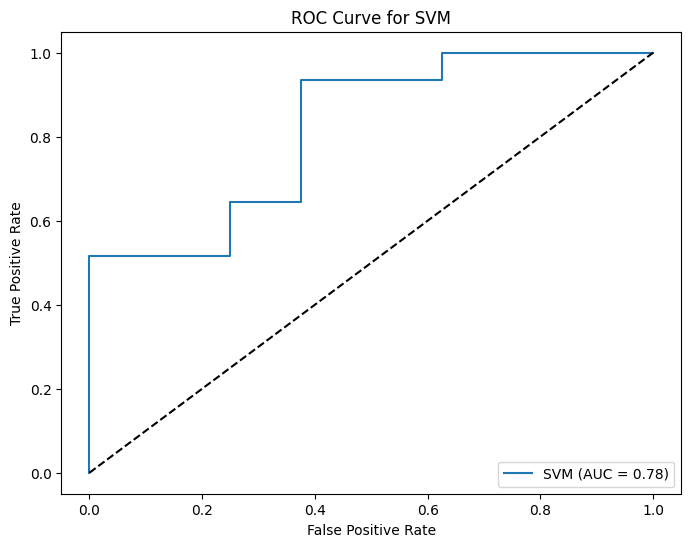

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and Y for features and labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Feature scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Initialize the SVM classifier with probability=True to enable probability estimates
svm = SVC(kernel='linear', probability=True, random_state=0)

# Fit the training data
svm.fit(X_train, y_train)

# Predictions and probabilities
predictions = svm.predict(X_test)
probabilities = svm.predict_proba(X_test)

# Classification report
print("Classification report:")
print(classification_report(y_test, predictions))

# ROC AUC score
model_roc_auc = roc_auc_score(y_test, predictions)
print("Area under the curve: ", model_roc_auc)

# False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1])

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

# Initialize conf_matrix as a dictionary if you want to store confusion matrices for different models.
conf_matrix_dict = {}
conf_matrix_dict['SVM'] = conf_matrix  # Store the confusion matrix for the SVM model.

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {model_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

#KNN NEIGHBOURS

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.96      0.84      0.90        31

    accuracy                           0.85        39
   macro avg       0.77      0.86      0.80        39
weighted avg       0.89      0.85      0.86        39

Area under the curve:  0.8568548387096774


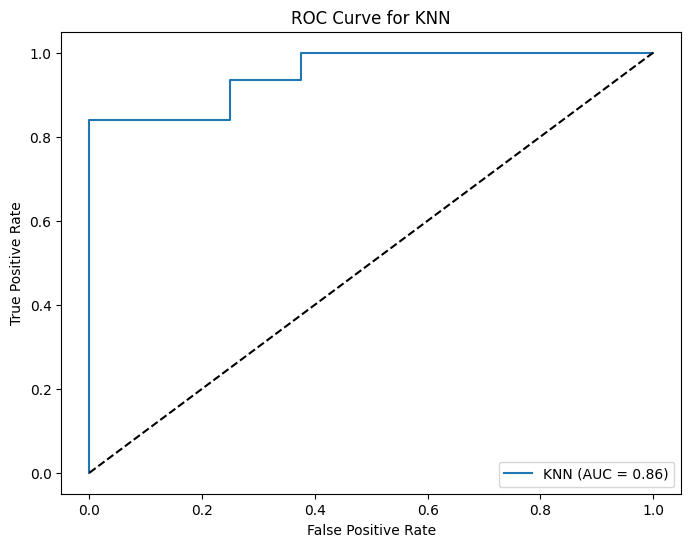

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and Y for features and labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Feature scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Initialize the KNN classifier (adjust n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Fit the training data
knn.fit(X_train, y_train)

# Predictions and probabilities
predictions = knn.predict(X_test)
probabilities = knn.predict_proba(X_test)

# Classification report
print("Classification report:")
print(classification_report(y_test, predictions))

# ROC AUC score
model_roc_auc = roc_auc_score(y_test, predictions)
print("Area under the curve: ", model_roc_auc)

# False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1])

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

# Initialize conf_matrix as a dictionary if you want to store confusion matrices for different models.
conf_matrix_dict = {}
conf_matrix_dict['KNN'] = conf_matrix  # Store the confusion matrix for the KNN model.

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {model_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()


#NAIVE BAYES

Classification report:
              precision    recall  f1-score   support

           0       0.35      1.00      0.52         8
           1       1.00      0.52      0.68        31

    accuracy                           0.62        39
   macro avg       0.67      0.76      0.60        39
weighted avg       0.87      0.62      0.65        39

Area under the curve:  0.7580645161290323


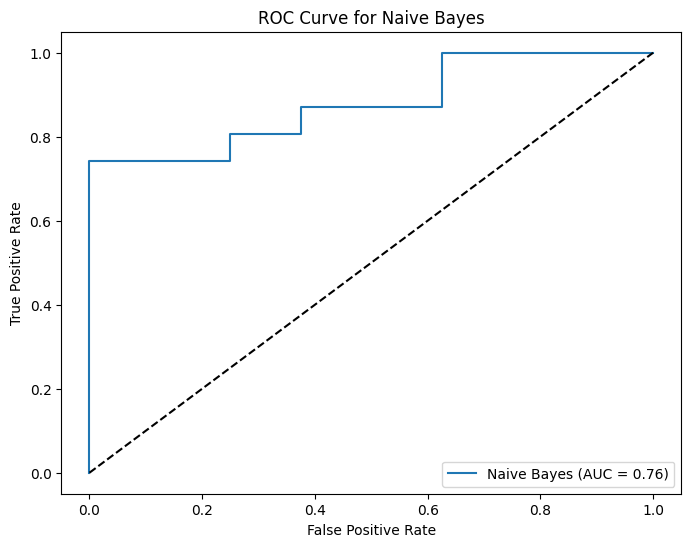

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and Y for features and labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Feature scaling (if necessary, although Naive Bayes is not always sensitive to scaling)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Fit the training data
nb.fit(X_train, y_train)

# Predictions and probabilities
predictions = nb.predict(X_test)
probabilities = nb.predict_proba(X_test)

# Classification report
print("Classification report:")
print(classification_report(y_test, predictions))

# ROC AUC score
model_roc_auc = roc_auc_score(y_test, predictions)
print("Area under the curve: ", model_roc_auc)

# False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1])

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

# Initialize conf_matrix as a dictionary if you want to store confusion matrices for different models.
conf_matrix_dict = {}
conf_matrix_dict['Naive Bayes'] = conf_matrix  # Store the confusion matrix for the Naive Bayes model.

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {model_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


#DECISION TREES

Classification report:
              precision    recall  f1-score   support

           0       0.41      0.88      0.56         8
           1       0.95      0.68      0.79        31

    accuracy                           0.72        39
   macro avg       0.68      0.78      0.68        39
weighted avg       0.84      0.72      0.74        39

Area under the curve:  0.7762096774193548


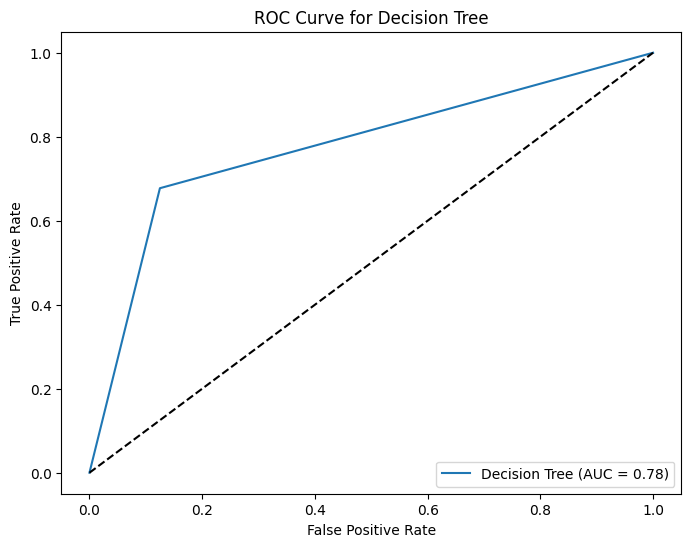

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and Y for features and labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Feature scaling (if necessary, although Decision Trees are not sensitive to scaling)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=0)

# Fit the training data
dt.fit(X_train, y_train)

# Predictions and probabilities
predictions = dt.predict(X_test)
probabilities = dt.predict_proba(X_test)

# Classification report
print("Classification report:")
print(classification_report(y_test, predictions))

# ROC AUC score
model_roc_auc = roc_auc_score(y_test, predictions)
print("Area under the curve: ", model_roc_auc)

# False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1])

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

# Initialize conf_matrix as a dictionary if you want to store confusion matrices for different models.
conf_matrix_dict = {}
conf_matrix_dict['Decision Tree'] = conf_matrix  # Store the confusion matrix for the Decision Tree model.

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {model_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [36]:
# To access a valid element of X_train, use an index within the range of available rows.
# For example, to access the first element (index 0):

print(X_train[0])

# Or, to access the last element, use index X_train.shape[0] - 1:

print(X_train[X_train.shape[0] - 1])

# To iterate through all elements in X_train:
for i in range(X_train.shape[0]):
    print(X_train[i])

[ 0.63239631 -0.02731081 -0.87985049  0.36806203  0.14406765  0.49280653
  0.30476869  0.49170115 -0.3137565  -0.32592164 -0.25848708 -0.23791175
 -0.33873289 -0.25879402 -0.2113724  -0.61257363  0.87112118  0.24786644
  0.19888239 -0.97586547 -0.55160318  0.07769494]
[ 1.01957066  0.19922317 -0.61914972  0.29364231 -0.12802138  0.44293848
  0.30139175  0.44287333 -0.47761692 -0.52867881 -0.34545671 -0.48241859
 -0.6101974  -0.34576406 -0.31865067 -0.50789898 -1.16955934  0.1041932
 -0.05981008 -0.716232    1.23632066 -0.05829386]
[ 0.63239631 -0.02731081 -0.87985049  0.36806203  0.14406765  0.49280653
  0.30476869  0.49170115 -0.3137565  -0.32592164 -0.25848708 -0.23791175
 -0.33873289 -0.25879402 -0.2113724  -0.61257363  0.87112118  0.24786644
  0.19888239 -0.97586547 -0.55160318  0.07769494]
[-1.05512719 -0.83337041 -0.9284778  -0.12997764  0.14406765 -0.15236125
 -0.14436412 -0.15344933  0.44321834  0.51889992 -0.06490951  0.09074355
  0.86575291 -0.06521554 -0.15277503 -0.2558165 

# Prediction System

In [37]:
input_data = (1.1, 2.0, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.37, 0.37, 0.38, 0.390, 0.40, 0.88, 0.99)


np_data = np.asanyarray(input_data)
prediction = svc.predict(np_data.reshape(1,-1))

if prediction == 2:
    print("this person has parkinson disease")
else:
    print("this person has no parkinson disease")

this person has no parkinson disease


In [38]:
input_data = (1.1, 2.0, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.37, 0.37, 0.38, 0.390, 0.40, 0.88, 0.99)


np_data = np.asanyarray(input_data)
prediction = svc.predict(np_data.reshape(1,-1))

if prediction == 1:
    print("this person has parkinson disease")
else:
    print("this person has no parkinson disease")

this person has parkinson disease
